# Sklearn adda Boost Regression for seasonal selections

https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
from random import randint
import numpy as np
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x20BB2A3A488)


In [2]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
# import numpy as np
from random import sample
#from sklearn.ensemble import RandomForestRegressor as rfr
#from sklearn.ensemble import ExtraTreesRegressor as etr
#from sklearn.ensemble import GradientBoostingRegressor as gbr
#from sklearn.ensemble import AdaBoostRegressor as abr
#from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
# from random import randint 
import math

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

In [3]:
def metrics(x, y):
    
    from sklearn import metrics
    try:
        ev = metrics.explained_variance_score(x, y)
    except:
        ev = np.nan
    print("Ev score: ", ev)
    
    try:
        me = metrics.max_error(x, y)
    except:
        me = np.nan
    print("Maximum Error: ", me)
    
    try:
        mae = metrics.mean_absolute_error(x, y)
    except:
        mae = np.nan
    print("Mean Absolute Error: ", mae)
    
    try:
        mse = metrics.mean_squared_error(x, y)
    except:
        mse = np.nan
    print("Mean Squared Error: ", mse)
    
    try:
        rmse = metrics.mean_squared_error(x, y, squared=False)
    except:
        rmse =  np.nan
    print("Root Mean Squared Error: ", rmse)
    
    try:
        msle = metrics.mean_squared_log_error(x, y)
    except:
        msle = np.nan
    print("Mean Squared Log Error: ", msle)
   
    try:
        rmsle = metrics.mean_squared_log_error(x, y, squared = False)
    except:
        rmsle =  np.nan
    print("Root Mean Squared Log Error : ", rmsle)
    
    try:
        mape = metrics.mean_absolute_percentage_error(x, y)
    except:
        mape = np.nan
    print("Mean Absolute Percentage Error: ", mape)
    
    try:
        medae = metrics.median_absolute_error(x, y)
    except:
        medae = np.nan
    print("Median Absolute Error: ", medae)
    
    try:
        r2 = metrics.r2_score(x, y)
    except:
        r2 = np.nan
    print("Coefficient of determination: ", r2)
    
    try:
        bias = bias = np.mean(x) - np.mean(y)
    except:
        bias = np.nan
    print("Bias: ", bias)
    
    n = len(x)
    print("n: ", n)
    
    return ev, me, mae, mse, rmse, msle, rmsle, mape, medae, r2, bias, n


In [4]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230215
20230215_084229


### Import data

In [5]:
data_date = "20230201"
drive = "D"

# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)

# model csv outputs
output_ml_csv = r"{0}:\cdu\data\ml_outputs".format(drive)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 0

In [6]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print(dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

In [7]:
ml_reg_dir= os.path.join(output_dir, "ml_reg_dir")
plots_dir = os.path.join(ml_reg_dir, "ml_reg_plots_dir")
all_plots_dir = os.path.join(plots_dir, "all")
no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
mk_dir_fn(output_dir)
mk_dir_fn(ml_reg_dir)
mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
mk_dir_fn(no_tern_plots_dir)

D:\cdu\data\zonal_stats\output\20230215
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\no_tern


## Load data

In [8]:
dir_

'D:\\cdu\\data\\zonal_stats\\output\\20230201\\ml_data_si_dir'

In [9]:
file_list = []
for f in glob(os.path.join(dir_, "*reg.csv")):
    print(f)
    file_list.append(f)

D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_climate_fillna_mean_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_climate_fillna_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_NO_climate_fillna_mean_fms_NOT_si_reg.csv
D:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_NO_climate_fillna_fms_NOT_si_reg.csv


In [10]:
df = pd.read_csv(file_list[index_], header=0)

In [11]:
df

,target,site,uid,date,bio_agb_kg1ha,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,nt001,119,20110523,0.00,13.78,47.00,25.85,23.87,8.48,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,barkely01,42,20111025,0.00,0.75,2.87,1.69,1.49,0.70,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,barkely02,43,20111026,0.00,2.12,13.78,4.97,4.73,2.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0.00,barkely04,45,20111026,0.00,2.12,6.42,4.37,4.47,1.22,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0.00,barkely03,44,20111026,0.00,0.75,3.29,1.82,1.64,0.70,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,ntadac0002,5,20160506,20805.22,15.54,42.39,29.12,29.27,6.84,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,ntaarp0001,1,20160602,30472.45,27.61,38.92,34.75,34.33,3.24,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,ntaarp0002,2,20160602,24414.13,9.06,22.31,14.40,14.21,3.60,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,ntaarp0003,3,20160603,17598.35,5.26,25.45,13.08,12.11,5.79,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


In [12]:
df.shape

(167, 180)

In [13]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [14]:
df2 = df.copy(deep=True)

In [15]:
print(list(df2.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

### Set variables to plot

In [16]:
# # predicted value is x
# value_x = 'bio_agb_kg1ha'
# # variable is y
# value_y = "b1_h99a_01122_mean"
# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


In [17]:
# value_y

In [18]:
# df2.shape

In [19]:
def save_fig(value_x, value_y, value_a, value_b, out_file):
    # Output to file
    output_file(out_file, 
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))



    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [20]:
# save_fig(value_x, value_y)

In [21]:
# column_list

In [22]:
column_list = df2.columns.to_list()
y_list = column_list[5:]
value_x = column_list[:1][0]

value_a = 'date'
value_b = 'b1_fpca2_0509_mean'


for i in y_list:
    value_y = i
    
    out_file = os.path.join(all_plots_dir,'all_sites_{0}_{1}.html'.format(value_x, value_y))
    print(f"Plot exported to: {out_file}")
    save_fig(value_x, value_y, value_a, value_b, out_file)
    

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_fpca2_0509_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_h99a_01122_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b1_h99a_01122_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b2_dp1_0509_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dp1_0509_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dp1_0509_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_tar

Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_min.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_max.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_med.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_b3_dim_1202_std.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_rain_d_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_et_ma_mean.html
Plot exported to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\ml_reg_plots_dir\all\all_sites_target_et_mp

### Drop AGB numbers which are high

In [23]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_dir, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [24]:
# df3.shape

In [25]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

## Choose which data set to run the models from

In [26]:
df_ml = df2
df_ml = df

In [27]:
print(list(df_ml.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

In [28]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date', 'bio_agb_kg1ha'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [29]:
print(list(df_ml))

['target', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1_0112_std', 'b1_dp1_0112_med', 'b2_dp1_0

In [30]:
df_ml.shape

(167, 176)

In [31]:
df_ml.head(5)

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0.00,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0.00,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0.00,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
3,0.00,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
4,0.00,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149


## Level of agb 0 values

In [32]:
model_data_ = df_ml
model_data_name = "all_values"


model_data_ = df_ml[df_ml['target']>0.0]
model_data_name = "no0_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(ml_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)
print(model_data_.shape)

# define model output name for all outputs
str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_maxd_{maxd}_{date_time_str}"

D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values
D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values
(110, 176)


In [33]:
model_data_.dropna(inplace=True)
print(model_data_.shape)

(110, 176)


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [34]:
model_data_

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
7,1894.20,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,1536.15,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,4736.01,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,17598.35,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Split off unseen data 

In [35]:

# Creating a dataframe with 50%
# values of original dataframe
unseen_data = model_data_.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 50% values
model_data = model_data_.drop(unseen_data.index)


In [36]:
unseen_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
46,4370.91,4.22,12.93,8.42,8.02,2.32,6.25,14.82,8.63,7.96,...,-1211147,1211147,2186047,-354007,1293000,2084536,1180000,2449488,5300988,8044983
133,22881.07,8.36,21.29,14.25,13.78,3.24,12.57,17.09,14.67,14.26,...,-1156337,1156337,3815343,441252,1557000,2468686,1432000,2812255,5428355,8370609
70,5173.71,1.49,15.54,7.89,6.73,3.91,5.52,12.47,10.05,10.11,...,-1733900,1733900,1243144,-1212193,1261000,1693881,1016000,1985927,3799551,4918354
58,3086.16,8.36,23.34,16.55,17.38,3.84,8.27,15.50,11.52,11.63,...,-2155125,2155125,1891224,-259214,1697000,2050187,1308000,2307692,3735009,4806562
12,1549.09,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
53,5606.44,4.73,12.11,7.41,6.73,2.11,5.81,14.03,10.31,10.72,...,-1857477,1857477,1384065,-926114,1532000,1939535,1214000,2208879,3742293,4819106
85,240.24,4.22,14.65,7.25,7.04,2.48,7.44,12.23,9.75,9.73,...,-2675086,2675086,1681553,97348,2051000,1918003,1352000,2098510,2898799,3477482
23,2608.76,2.48,17.38,6.53,5.83,3.52,3.69,7.13,5.42,5.23,...,-1713367,1713367,1344593,-1005217,1684000,1988912,1311000,2219275,3395493,4241613
17,1947.59,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2027067,2027067,-375297,-1382390,1684000,1351286,995000,1480214,1957505,2193402
43,17994.76,4.73,34.33,11.16,9.06,6.23,6.96,20.05,11.07,10.10,...,-920139,920139,1753585,-396804,1280000,2027981,1174000,2369483,4827303,6930607


In [37]:
model_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
7,1894.20,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
9,1164.24,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,4736.01,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
18,1293.60,3.74,8.36,5.03,4.73,1.31,6.60,12.27,8.60,8.32,...,-1971154,1971154,1576238,-158614,1697000,1768182,1205000,1966170,2873837,3440832
19,2540.85,2.87,14.65,5.36,4.22,2.92,3.66,6.86,5.56,5.73,...,-2277228,2277228,1108429,-830289,1825000,1864126,1273000,2064548,2995999,3621713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,16375.18,19.30,27.61,23.58,23.34,2.53,15.64,19.64,18.24,18.35,...,-1222031,1222031,3647779,881563,1718000,2675640,1576000,3000000,5472222,8485610
162,20805.22,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,30472.45,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,24414.13,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733


# Scatter plots with error

In [38]:
# for i in model_data.columns[1:]:
#     print(i)
#     value_x = 'target'
#     value_y_loop = str(i)
#     plt.figure(figsize=(10,4))
#     # left plot
#     plt.subplot(1,2,1)
#     sns.regplot(model_data[value_x], model_data[value_y_loop], line_kws={"color":"red"})
#     plt.xlabel(value_x)
#     plt.ylabel(value_y_loop)
#     plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(model_data[value_x], model_data[value_y_loop])

#     print('slope: {:.10f}'.format(slope))
#     print('intercept {:.10f}'.format(intercept))
#     print('r2: {:.10f}'.format(r_value))
#     print('P value: {:.10f}'.format(p_value))
#     print('std error: {:.10f}'.format(std_err))
    
#     # right plot
#     plt.subplot(1,2,2)
#     sns.regplot(model_data[value_x], model_data[value_y_loop], lowess=True, line_kws={"color":"green"})
#     plt.xlabel(value_x)
#     plt.ylabel("Error")
#     plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
#     plt.tight_layout()
#     plt.show()
    


In [39]:
# # value_x = 'bio_agb_kg1ha'
# # value_y = 'b2_dbi_mean'
# sns.regplot(x= value_x, y=value_y, data=df)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# print("slope: ", slope)
# print("intersept: ", intercept)
# print("r2: ", r_value)
# print("P_value: ", p_value)
# print("std error: ", std_err)

In [40]:
# # value_x = 'bio_agb_kg1ha'
# # value_y = 'b3_dbi_mean'
# sns.scatterplot(x= value_x, y=value_y, data=df)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

# print("slope: ", slope)
# print("intersept: ", intercept)
# print("r2: ", r_value)
# print("P_value: ", p_value)
# print("std error: ", std_err)

In [41]:
# randomly split data into train and test datasets, the user needs to define the variables 

# Two example of how you can call the predictor variables 

#xdata1 = df4[df4.columns[12:]].astype('float32')

#xdata1 = df[['psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa', 'psB2d', 'psB3d', 'psB4d', 'psB5d', 'psB6d', 'ratio32d', 'ratio42d', 'ratio43d', 'ratio52d', 'ratio53d', 'ratio54d', 'ratio62d', 'ratio63d', 'ratio64d', 'ratio65d', 'GSAVId', 'GNDVId', 'CVId', 'NDGId', 'RId', 'NBRd', 'NDIId', 'GDVId', 'MSAVId', 'DVId', 'SAVId', 'NDVId', 'MSRd']].astype('float32')
#xdata1 = df[['psB1a', 'psB2a', 'psB3a', 'psB4a', 'psB5a', 'psB6a', 'ratio32fa', 'ratio42fa', 'ratio43fa', 'ratio52fa', 'ratio53fa', 'ratio54fa', 'ratio62fa', 'ratio63fa', 'ratio64fa', 'ratio65fa', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIfa', 'GSAVIa', 'GNDVIfa', 'GNDVIa', 'CVIfa', 'CVIa', 'NDGIfa', 'NDGIa', 'RIfa', 'RIa', 'NBRfa', 'NBRa', 'NDIIfa', 'NDIIa', 'GDVIfa', 'GDVIa', 'MSAVIfa', 'MSAVIa', 'DVIfa', 'DVIa', 'SAVIfa', 'SAVIa', 'NDVIfa', 'NDVIa', 'MSRfa', 'MSRa']]
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(61, 175) (61,)
(27, 175) (27,)


### Plot up Histograms of Lidar meanCHM for train and test datasets

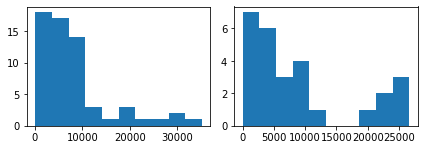

In [42]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [43]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [44]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [45]:
# n_est = 300
# rs = 1
# maxd = 4

# rng = np.random.RandomState(rs)
# rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
# print(rfrModel_1)
# mdl = "abr"
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
# print(str_model)

In [46]:
# from random import randint 
# x = randint(1, 100)
# n_est = randint(1, 100)
# lr= randint(1, 10)/10
# rs = randint(1, 10)
# maxd = randint(1, 10)
# loss = 'squared_error'

# rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
# print(rfrModel_1)
# mdl = "gbr"
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_lr_{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
# print(str_model)

In [47]:
# n_est = randint(20, 300)
# maxd = None #randint(1, 10)
# maxd = randint(1, 10)
# m_feat = 'log2'
# m_feat = None
# rfrModel_1 = rfr(n_estimators=n_est, max_features=m_feat, max_depth = maxd)#, max_depth={maxd}) #, oob_score=True,  max_depth={maxd}) #, min_samples_split=1.0,n_jobs=-1) 
# mdl = "rf"
# print(rfrModel_1)
# str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_m_feat_{m_feat}_m_depth_{maxd}_{date_time_str}"
# print(str_model)

In [48]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [49]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1


In [50]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [51]:
np.nan_to_num(X_1)

array([[5.8252869e+00, 2.5453907e+01, 9.8642607e+00, ..., 2.1061710e+06,
        3.8875130e+06, 5.0731240e+06],
       [1.7888010e+00, 5.8252869e+00, 2.8559160e+00, ..., 1.4200980e+06,
        2.1493900e+06, 2.4401480e+06],
       [5.2614689e+00, 2.3343081e+01, 1.2862198e+01, ..., 3.1152100e+06,
        5.6378600e+06, 8.9338470e+06],
       ...,
       [1.3779837e+01, 2.5453907e+01, 1.8835165e+01, ..., 1.9493390e+06,
        3.3480450e+06, 4.1655750e+06],
       [1.3779837e+01, 2.6528566e+01, 1.9780863e+01, ..., 3.2342700e+06,
        5.7001970e+06, 9.1085740e+06],
       [1.7888010e+00, 1.2109756e+01, 4.5190563e+00, ..., 1.9839820e+06,
        3.0909090e+06, 3.7649440e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [52]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Ev score:  0.9867660133433396
Maximum Error:  2682.034476444639
Mean Absolute Error:  646.8877776672699
Mean Squared Error:  882541.5315509754
Root Mean Squared Error:  939.4368161568799
Mean Squared Log Error:  0.8852134490863633
Root Mean Squared Log Error :  0.9408578261811735
Mean Absolute Percentage Error:  2.11260705544197
Median Absolute Error:  424.6654357910156
Coefficient of determination:  0.9856439370945779
Bias:  -262.6393469444047
n:  61
plot saved to: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values\abr_no0_values_n_est_300_maxd_4_20230215_084229_training_plot.pdf


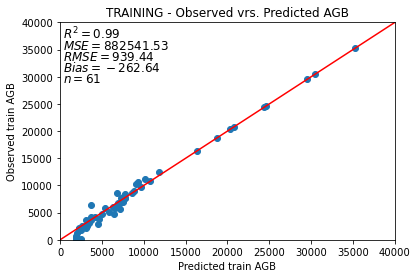

In [53]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
train_predict = rfrLCHM.predict(X_1)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))

train_ev, train_me, train_mae, train_mse, train_rmse, train_msle, train_rmsle, train_mape, train_medae, train_r2, \
train_bias, train_n = metrics(y_1, train_predict)

#plt.scatter(rfrLCHM.predict(X_1), y_1,) 
# print()
plt.scatter(train_predict, y_1)  
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)
#adding text inside the plot

plt.text(300, 37000, f'$R^2 = {round(train_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(train_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(train_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(train_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {train_n}$', fontsize = 12)

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TRAINING - Observed vrs. Predicted AGB')
plt.ylabel('Observed train AGB')
plt.xlabel('Predicted train AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')


plot_out = os.path.join(model_outputs, f'{str_model}_training_plot.pdf')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")
# runs +=1

plt.show()

Ev score:  0.6294759746011789
Maximum Error:  13895.79267578125
Mean Absolute Error:  3536.1024462156415
Mean Squared Error:  27486658.813298106
Root Mean Squared Error:  5242.772054295142
Mean Squared Log Error:  1.4840050268830456
Root Mean Squared Log Error :  1.2181974498754484
Mean Absolute Percentage Error:  5.239248534282348
Median Absolute Error:  2071.6336304800852
Coefficient of determination:  0.6281269969365398
Bias:  -315.7649428120694
n:  27


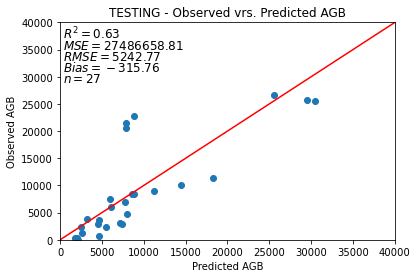

In [54]:
#y2_predict = rfrLCHM.predict(X_2)
test_predict = rfrLCHM.predict(X_2)
# print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
# print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
# print('RMSE =', format(np.sqrt(np.mean((test_predict - y_2) ** 2)), '.3f'))
# #print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
# print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
# print('n =' , len(y_2))


# r2 = round(rfrLCHM.score(X_2, y_2), 2)
# mse = round(np.mean((y_2 - rfrLCHM.predict(X_2))**2), 2)
# rmse = round(np.sqrt(np.mean((test_predict - y_2) ** 2)), 2)
# bias = round(np.mean(y_2) - np.mean(test_predict), 2)


test_ev, test_me, test_mae, test_mse, test_rmse, test_msle, test_rmsle, test_mape, \
test_medae, test_r2, test_bias, test_n = metrics(y_2, test_predict)


#plt.scatter(test_predict, y_2 ,s=10, c='b', marker='o')
plt.scatter(test_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(test_r2,2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

                  band                       n
78     b1_dim_0305_med   9.961455421280533e-05
135        rain_d_mean   9.304385043190072e-06
73     b3_dp1_0509_med    9.18925992527763e-05
95     b2_dim_0608_min   8.085290284447651e-05
0    b1_fpca2_0509_min      0.0845823288452517
..                 ...                     ...
122   b1_dim_1202_mean  0.00018696177176075237
37    b6_dbi_0608_mean  0.00016423868592875613
100    b3_dim_0608_min  0.00016177611066468253
118    b3_dim_0911_med   0.0001587896994509963
168              NDIIm  0.00015826203276292513

[175 rows x 2 columns]


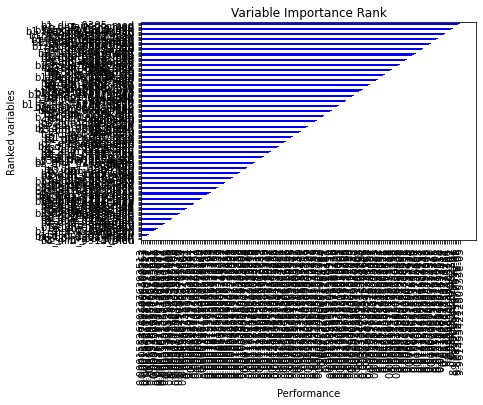

In [55]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')


plot_out = os.path.join(model_outputs, f'Band_Importance_Score_{str_model}.pdf')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [56]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [57]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 78 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 78 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    175 non-null    object 
 1   n       175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [58]:
num_bf_selection = 0.005
nbfs = str(num_bf_selection)
num_bf_str = nbfs[2:]
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [59]:
num_bf_str

'005'

In [60]:
col_features = df_var.band.tolist()
column_var = df_var.band.tolist()
col_features_n = df_var.n.tolist()

In [61]:
print(len(col_features))

36


In [62]:
#column_var = col_features
column_var.insert(0, 'target')

In [63]:
print(len(col_features))

36


In [64]:
df_var

,band,n
0,b1_fpca2_0509_min,0.08
2,b1_fpca2_0509_mean,0.08
104,b3_dim_0608_std,0.08
142,evp_s_mean,0.06
6,b1_h99a_01122_max,0.05
101,b3_dim_0608_max,0.03
114,b2_dim_0911_std,0.03
5,b1_h99a_01122_min,0.02
149,rh_tmin_mean,0.02
32,b5_dbi_0608_mean,0.02


In [65]:
column_var

['target',
 'b1_fpca2_0509_min',
 'b1_fpca2_0509_mean',
 'b3_dim_0608_std',
 'evp_s_mean',
 'b1_h99a_01122_max',
 'b3_dim_0608_max',
 'b2_dim_0911_std',
 'b1_h99a_01122_min',
 'rh_tmin_mean',
 'b5_dbi_0608_mean',
 'b1_fpca2_0509_max',
 'b2_dbi_0608_max',
 'rh_tmax_mean',
 'b1_fpca2_0509_med',
 'b3_dim_0305_std',
 'b3_dim_0911_std',
 'b3_dbi_0608_med',
 'et_tc_mean',
 'tmin_mean',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_min',
 'b2_dim_0911_med',
 'b3_dbi_0608_max',
 'b3_dim_0608_med',
 'vp_d_mean',
 'b1_dja_0305_std',
 'b5_dbi_0608_max',
 'mslp_mean',
 'b1_h99a_01122_std',
 'b2_dbi_0608_med',
 'b2_dim_0911_max',
 'b1_dim_0911_min',
 'b4_dbi_0608_min',
 'b5_dbi_0608_min',
 'b5_dbi_0608_med',
 'ratio62m']

In [66]:
select_model_data = df_ml[column_var]

In [67]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'selected_feature_{str_model}_feat_imp_n_{num_bf_str}.csv'))
df_corr

,target,b1_fpca2_0509_min,b1_fpca2_0509_mean,b3_dim_0608_std,evp_s_mean,b1_h99a_01122_max,b3_dim_0608_max,b2_dim_0911_std,b1_h99a_01122_min,rh_tmin_mean,...,b5_dbi_0608_max,mslp_mean,b1_h99a_01122_std,b2_dbi_0608_med,b2_dim_0911_max,b1_dim_0911_min,b4_dbi_0608_min,b5_dbi_0608_min,b5_dbi_0608_med,ratio62m
target,1.00,0.67,0.69,-0.16,-0.25,0.65,-0.38,0.20,0.60,0.37,...,-0.56,-0.25,0.29,-0.58,0.67,-0.44,-0.40,-0.64,-0.64,-0.10
b1_fpca2_0509_min,0.67,1.00,0.95,-0.24,-0.20,0.67,-0.46,0.10,0.71,0.31,...,-0.64,-0.20,0.16,-0.55,0.72,-0.45,-0.25,-0.59,-0.63,-0.19
b1_fpca2_0509_mean,0.69,0.95,1.00,-0.19,-0.25,0.77,-0.45,0.20,0.77,0.36,...,-0.68,-0.23,0.25,-0.63,0.76,-0.50,-0.34,-0.67,-0.70,-0.14
b3_dim_0608_std,-0.16,-0.24,-0.19,1.00,0.09,-0.13,0.21,0.27,-0.24,-0.03,...,0.38,-0.02,0.13,0.25,-0.11,0.09,0.10,0.17,0.29,0.01
evp_s_mean,-0.25,-0.20,-0.25,0.09,1.00,-0.27,0.30,-0.18,-0.21,-0.33,...,0.33,-0.23,-0.19,0.32,-0.27,0.21,0.26,0.32,0.33,-0.11
b1_h99a_01122_max,0.65,0.67,0.77,-0.13,-0.27,1.00,-0.47,0.32,0.86,0.44,...,-0.69,-0.31,0.56,-0.70,0.75,-0.44,-0.47,-0.75,-0.74,-0.01
b3_dim_0608_max,-0.38,-0.46,-0.45,0.21,0.30,-0.47,1.00,-0.10,-0.45,-0.27,...,0.39,0.18,-0.19,0.35,-0.45,-0.22,0.11,0.38,0.40,0.03
b2_dim_0911_std,0.20,0.10,0.20,0.27,-0.18,0.32,-0.10,1.00,0.13,0.29,...,-0.14,-0.20,0.43,-0.34,0.51,-0.30,-0.28,-0.29,-0.22,0.21
b1_h99a_01122_min,0.60,0.71,0.77,-0.24,-0.21,0.86,-0.45,0.13,1.00,0.37,...,-0.69,-0.27,0.09,-0.59,0.67,-0.37,-0.32,-0.67,-0.69,-0.15
rh_tmin_mean,0.37,0.31,0.36,-0.03,-0.33,0.44,-0.27,0.29,0.37,1.00,...,-0.30,-0.58,0.25,-0.46,0.47,-0.30,-0.29,-0.36,-0.35,0.25


In [68]:
variable_imp_list = dfsort.band.to_list()
variable_imp_list

['b1_dim_0305_med',
 'rain_d_mean',
 'b3_dp1_0509_med',
 'b2_dim_0608_min',
 'b1_fpca2_0509_min',
 'b1_fpca2_0509_mean',
 'b3_dim_0608_std',
 'evp_s_mean',
 'b1_h99a_01122_max',
 'b3_dim_0608_max',
 'b2_dim_0911_std',
 'b1_h99a_01122_min',
 'rh_tmin_mean',
 'b5_dbi_0608_mean',
 'b1_fpca2_0509_max',
 'b2_dbi_0608_max',
 'rh_tmax_mean',
 'b1_fpca2_0509_med',
 'b3_dim_0305_std',
 'b3_dim_0911_std',
 'b3_dbi_0608_med',
 'et_tc_mean',
 'tmin_mean',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_min',
 'b2_dim_0911_med',
 'b3_dbi_0608_max',
 'b3_dim_0608_med',
 'vp_d_mean',
 'b1_dja_0305_std',
 'b5_dbi_0608_max',
 'mslp_mean',
 'b1_h99a_01122_std',
 'b2_dbi_0608_med',
 'b2_dim_0911_max',
 'b1_dim_0911_min',
 'b4_dbi_0608_min',
 'b5_dbi_0608_min',
 'b5_dbi_0608_med',
 'ratio62m',
 'b1_dim_1202_std',
 'b3_dim_1202_std',
 'b1_dim_0911_mean',
 'b4_dbi_0608_std',
 'b2_dim_0911_min',
 'vp_mean',
 'b6_dbi_0608_max',
 'b2_dim_1202_med',
 'b4_dbi_0608_med',
 'b3_dbi_0608_min',
 'b1_dp1_0509_std',
 'b4_dbi_0608_m

## Run same model and same parameters with selected features

In [69]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 36) (116,)
(51, 36) (51,)


In [70]:

# if mdl == "abr":
    
#     rng = np.random.RandomState(rs)
select_f_model = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
#     print(str_model)


# elif mdl== "gbr":
#     select_f_model = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
#     select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr_{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
#     print(str_model)

# elif mdl== "rf":
# select_f_model = rfr(n_estimators=n_est, max_features=m_feat) #n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
# select_f_model_fit = select_f_model.fit(X_1, y_1)
#     str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_max_{m_feat}_{date_time_str}"
       
# else:
#     print("pass")
#     pass


feature_importance = select_f_model_fit.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi_fs = enumerate(select_f_model_fit.feature_importances_)
cols = xdata1.columns
fi_sf_result = [(value,cols[i]) for (i,value) in fi_fs]
print(str_model)
        

abr_no0_values_n_est_300_maxd_4_20230215_084229


In [71]:
np.nan_to_num(X_1)

array([[1.1309701e+01, 1.7247610e+01, 1.8405162e+00, ..., 2.2320000e+03,
        2.3965000e+03, 2.2464662e+07],
       [4.2191148e+00, 8.5756245e+00, 4.3174067e+00, ..., 2.1890000e+03,
        2.5070000e+03, 2.9146596e+07],
       [1.3779837e+01, 1.8835165e+01, 1.6944302e+00, ..., 2.4000000e+03,
        2.6115000e+03, 2.2193598e+07],
       ...,
       [9.0568724e+00, 1.4590728e+01, 1.7399263e+00, ..., 1.5900000e+03,
        1.7710000e+03, 4.9228908e+07],
       [1.6449720e+01, 2.3644735e+01, 1.2732219e+00, ..., 1.9840000e+03,
        2.1100000e+03, 2.0766626e+07],
       [4.2191148e+00, 8.1780252e+00, 9.3005381e+00, ..., 2.8070000e+03,
        3.1235000e+03, 2.5539540e+07]], dtype=float32)

Here

                  band                      n
4    b1_h99a_01122_max    0.09599881275066592
21     b2_dim_0911_med    0.09283176530128408
7    b1_h99a_01122_min    0.08878000502553961
33     b5_dbi_0608_min    0.06490585625582126
3           evp_s_mean    0.04195377067303329
18           tmin_mean    0.03727264484720794
30     b2_dim_0911_max   0.035596283453028614
25     b1_dja_0305_std    0.03521202630212801
11     b2_dbi_0608_max    0.03518494043039451
19    b2_dbi_0608_mean   0.033840049935169696
15     b3_dim_0911_std    0.03311055680106275
20     b2_dbi_0608_min   0.028311981740386016
2      b3_dim_0608_std   0.026927717829127343
6      b2_dim_0911_std    0.02617850357534809
29     b2_dbi_0608_med   0.025405981450380602
8         rh_tmin_mean   0.022474738494289347
24           vp_d_mean   0.021500850519917805
28   b1_h99a_01122_std   0.020315800430231644
22     b3_dbi_0608_max   0.018528580988135045
5      b3_dim_0608_max   0.017376795326742037
31     b1_dim_0911_min    0.017284

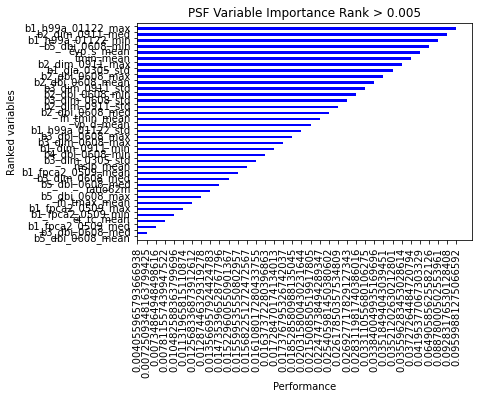

In [72]:
fi_sf_result = np.array(fi_sf_result)
score = (fi_sf_result[:,0])
band = fi_sf_result[:,1]
a = fi_sf_result[np.argsort(fi_sf_result[:, 1])]

df_sf_band = pd.DataFrame(dict(band=band,n=score))
df_sf_band['n'].astype('float')
df_sf_sort = df_sf_band.sort_values(['n'], ascending=[False])
print(df_sf_sort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
df_sf_sort2 = df_sf_band.sort_values(['n'], ascending=[True])
b = df_sf_sort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind_sf = np.arange(len(df_sf_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind_sf, df_sf_sort2.n, width, color='blue')
ax.set(yticks=ind_sf + width, yticklabels= g, ylim=[2*width - 1, len(df_sf_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title(f'PSF Variable Importance Rank > {nbfs}')


plot_out = os.path.join(model_outputs, f'PSF_{nbfs}_Band_Importance_Score_{str_model}.pdf')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [73]:
df_sf_sort['n'].astype('float')
df_sf_sort.info()
df_sf_sort['n'] = df_sf_sort['n'].astype('float')
df_sf_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 4 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    36 non-null     object
 1   n       36 non-null     object
dtypes: object(2)
memory usage: 864.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 4 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    36 non-null     object 
 1   n       36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [74]:
# add feature importance and scores to lists
col_sf_features = df_sf_sort.band.tolist()
col_sf_features_n = df_sf_sort.n.tolist()

Ev score:  0.7296276028474633
Maximum Error:  13431.890241350446
Mean Absolute Error:  3233.8382773705757
Mean Squared Error:  17719823.368535127
Root Mean Squared Error:  4209.492055882173
Mean Squared Log Error:  21.26529037044044
Root Mean Squared Log Error :  4.611430403946311
Mean Absolute Percentage Error:  4.921396209190181e+18
Median Absolute Error:  2353.126396179199
Coefficient of determination:  0.7254968267046715
Bias:  -516.3816831023505
n:  51


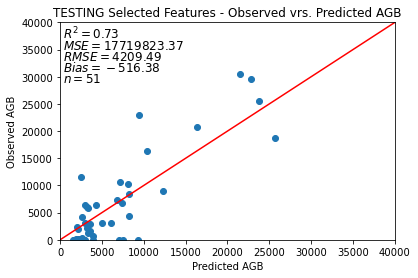

In [75]:
# predict model on test data
test_sf_predict = select_f_model_fit.predict(X_2)

# calculate metrics
test_sf_ev, test_sf_me, test_sf_mae, test_sf_mse, test_sf_rmse, test_sf_msle, test_sf_rmsle, \
test_sf_mape, test_sf_medae, test_sf_r2, test_sf_bias, test_sf_n = metrics(y_2, test_sf_predict)

plt.scatter(test_sf_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('TESTING Selected Features - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(test_sf_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(test_sf_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(test_sf_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(test_sf_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {test_sf_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

### Read in unseen data

In [76]:
# select selected features and drop target
selected_unseen_data = unseen_data[column_var]
unseen_target = selected_unseen_data.target.tolist()
selected_unseen_data.drop("target", axis=1, inplace=True)

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Ev score:  0.7178328256907707
Maximum Error:  13431.890642392105
Mean Absolute Error:  2242.4946345446297
Mean Squared Error:  14633153.877352834
Root Mean Squared Error:  3825.3305579195157
Mean Squared Log Error:  0.4107553279006306
Root Mean Squared Log Error :  0.6409019643444936
Mean Absolute Percentage Error:  0.5717098134728157
Median Absolute Error:  1208.000420169445
Coefficient of determination:  0.6974283181060916
Bias:  993.3856666261954
n:  22


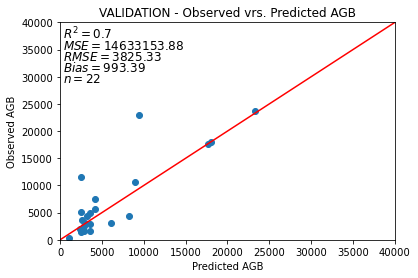

In [77]:
# predict unseen data
val_predict = select_f_model_fit.predict(selected_unseen_data)

# calculate metrics
val_ev, val_me, val_mae, val_mse, val_rmse, val_msle, val_rmsle, val_mape, val_medae, \
val_r2, val_bias, val_n = metrics(unseen_target, val_predict)

# ------------------------------ plot -----------------------------------

plt.scatter(val_predict, unseen_target) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('VALIDATION - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(val_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(val_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(val_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(val_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {val_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_validation_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

 - Explained variance (Ev score) - the proportion of the variability of the predictions in the model. The best score is 1.
 - Max Error (me) - Captures the worst case error between the predicted and actual value.
 - Mean Absolute Error (MAE) - Mean of the absolute difference between actual and predicted values.
 - Mean Squared Error (MSE) - Mean of the squared distances between actual and predicted values. Used to check how close the estimates are to the actual values.
    
   - Note: Squaring the single bad prediction, will make the error worse and skew the metric towards overestimating the model's badness.
    
   - Note: If the errors are smaller or smaller than 1, it may lead to underestimate the model's badness
    
 - Root of Mean Squared Error (MSE) or root of the mean squared distances between actual and predicted values. Higher the RMSE the larger the deviation in actual and predicted value. Lower the RMSE value the better the model is with its predictions
 
  - Note: The value of MSE is same as output unit, which makes the interpretation of loss easy.
 
  - Note: Not robust to outliers.
 
 - Mean Squared Log Error (MSLE) - a variation of Mean Squared Error. Use MSLE, when you don't want to penalize large differences between actual and predicted value.
 
 - Root Mean Squared Log Error (RMSLE) - the root of MSLE. Prefered when the targets have exponential growth. And our focus is on percentage errors rather than the absolute error.
 
 - Mean Absolute Percentage Error (MAPE) - also known as Mean Absolute Percentage Deviation (MAPD). It is sensitive to relative errors, that essentially scales Mean Absolute Deviation (MAD) to be in percentage units instead of variable's units. Commanly used for forecast accuracy.
  - Median Absolute Error (MedAE) - Median of all absolute differences between actual and predicted values.
  
  - R2 coefficient of determination - Used to measure the goodness of fit. Greater the value of R-squared, better the regression model. For the training dataset, it is bounded between 0 and 1, if SSE > SST, it can be negative for the test dataset.
  
  https://www.linkedin.com/pulse/regression-metrics-all-why-mse-aishwarya-b/

Why Mean Square Error of all metrics?

The error decreases with increase in sample size as it is normally distributed. With more experience it is less prone to errors. That's why it is preferred over other metrics.
For example,

 - If we have 100 dataset and let's say we have Sum of Squared Errors (SSE) as 200, then the error will be 200/100 = 2
 - We increase our dataset to 500 and let's say we have SSE as 800, then the error will be 800/500 = 1.6
 - Again we increase our dataset to 1000 and let's say the SSE as 1200, then the error will be 1200/1000 = 1.2

So, it's clear, increase in dataset decreases the error.
That's why of all metrics, MSE is preferred and commanly used.

### Create and export pickle file

In [78]:
import pickle

pkl_out = os.path.join(model_outputs, f'{str_model}.pkl')

with open(pkl_out, 'wb') as f:
    pickle.dump(select_f_model_fit, f)
    
print(f"Pickle file exported: {pkl_out}")

Pickle file exported: D:\cdu\data\zonal_stats\output\20230215\ml_reg_dir\no0_values\abr_no0_values_n_est_300_maxd_4_20230215_084229.pkl


Ev score:  0.7178328256907707
Maximum Error:  13431.890642392105
Mean Absolute Error:  2242.4946345446297
Mean Squared Error:  14633153.877352834
Root Mean Squared Error:  3825.3305579195157
Mean Squared Log Error:  0.4107553279006306
Root Mean Squared Log Error :  0.6409019643444936
Mean Absolute Percentage Error:  0.5717098134728157
Median Absolute Error:  1208.000420169445
Coefficient of determination:  0.6974283181060916
Bias:  993.3856666261954
n:  22


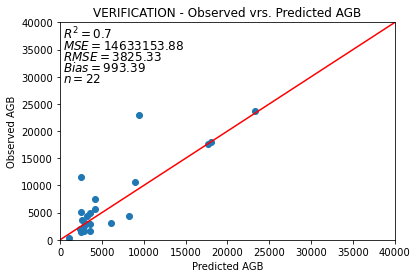

In [79]:
with open(pkl_out, 'rb') as f:
    select_f_model_fit = pickle.load(f)
    
    # fit model on unseen data
    verify_predict = select_f_model_fit.predict(selected_unseen_data)

# calculate metrics    
ver_ev, ver_me, ver_mae, ver_mse, ver_rmse, ver_msle, ver_rmsle, ver_mape, ver_medae, \
ver_r2, ver_bias, ver_n = metrics(unseen_target, verify_predict)

# ------------------------------ plot -----------------------------------

plt.scatter(verify_predict, unseen_target) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.title('VERIFICATION - Observed vrs. Predicted AGB')
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {round(ver_r2, 2)}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {round(ver_mse, 2)}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {round(ver_rmse, 2)}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {round(ver_bias, 2)}$', fontsize = 12)
plt.text(300, 29000, f'$n = {ver_n}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_sf_verification_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

## Add model info and metrics to table

In [80]:
str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"

In [81]:
str_model = f"{mdl}_{model_data_name}_n_est_{n_est}_maxd_{maxd}_{date_time_str}"

In [82]:
# Collatemetrics into dict

data = {
       "data": model_data_name,

        "model": mdl,
        "n_estimator": n_est,
        "max_feature": np.nan,
        "max_depth":maxd,
        "date_time": date_time_str,
        "b_import": nbfs,
        "feature" : col_features,
        "feat_score": col_features_n,
       "pickle": pkl_out,
        "num_f_sel": num_bf_selection,
        "train_ev": train_ev,
       "train_me": train_me,
       "train_mae": train_mae,
       "train_mse": train_mse,
       "train_rmse": train_rmse,
       "train_msle": train_msle,
       "train_rmsle": train_rmsle,
       "train_mape": train_mape,
       "train_medae": train_medae,
       "train_r2": train_r2,
       "train_bias": train_bias,
       "train_n": train_n,
        
       "test_ev": test_ev,
       "test_me": test_me,
       "test_mae": test_mae,
       "test_mse": test_mse,
       "test_rmse": test_rmse,
       "test_msle": test_msle,
       "test_rmsle": test_rmsle,
       "test_mape": test_mape,
       "test_medae": test_medae,
       "test_r2": test_r2,
       "test_bias": test_bias,
       "test_n": test_n,
        "sf_feature" : col_sf_features,
        "sf_feat_score": col_sf_features_n,
        
       "test_sf_ev": test_sf_ev,
       "test_sf_me": test_sf_me,
       "test_sf_mae": test_sf_mae,
       "test_sf_mse": test_sf_mse,
       "test_sf_rmse": test_sf_rmse,
       "test_sf_msle": test_sf_msle,
       "test_sf_rmsle": test_sf_rmsle,
       "test_sf_mape": test_sf_mape,
       "test_sf_medae": test_sf_medae,
       "test_sf_r2": test_sf_r2,
       "test_sf_bias": test_sf_bias,
       "test_sf_n": test_sf_n,
        
        "val_ev": val_ev,
       "val_me": val_me,
       "val_mae": val_mae,
       "val_mse": val_mse,
       "val_rmse": val_rmse,
       "val_msle": val_msle,
       "val_rmsle": val_rmsle,
       "val_mape": val_mape,
       "val_medae": val_medae,
       "val_r2": val_r2,
       "val_bias": val_bias,
       "val_n": val_n,
    
       "ver_ev": ver_ev,
       "ver_me": ver_me,
       "ver_mae": ver_mae,
       "ver_mse": ver_mse,
       "ver_rmse": ver_rmse,
       "ver_msle": ver_msle,
       "ver_rmsle": ver_rmsle,
       "ver_mape": ver_mape,
       "ver_medae": ver_medae,
       "ver_r2": ver_r2,
       "ver_bias": ver_bias,
       "ver_n": ver_n,
       }




In [83]:
# create and export dataframe with metrics
df_out = pd.DataFrame(data)
out_path = os.path.join(output_ml_csv, f"{str_model}_score.csv")
df_out.to_csv(out_path, index=False)
print(out_path)

D:\cdu\data\ml_outputs\abr_no0_values_n_est_300_maxd_4_20230215_084229_score.csv
